## This script will allow us to quickly make plots of average CpG methlylation over a region.
## We will also generate Pearson correlation coefficients for replicates.

### Edwin Neumann
### 01/05/2024

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [23]:
# import modkit_pileup.bed and assign the headers
pileup = pd.read_csv('./experiments/231216_Prnp_KRABless/mouse_980-1/20231216_1354_MN44120_FAY08737_953dd6cb/fast5_pass/pass/modkit_pileup.bed', sep='\s+', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'modbase', 'score', 'strand', 'baseStart', 'baseEnd', 'RGB', 'ValidCoverage', 'FracModified', 'NumMod', 'NumCanonical', 
         'NumOther', 'NumDelete', 'NumFail', 'NumDiff', 'NumNoCall']
pileup.columns = header[:len(pileup.columns)]
pileup['position'] = pileup['baseEnd'] - 131749415
bins = list(range(0,5000,100)) + [5000]
pileup['bin'] = pd.cut(pileup['position'], bins=bins, labels=False, right=False)
pileup = pileup.dropna(subset=['bin'])
# Calculate the average 'FracModified' within each bin
binned_data = pileup.groupby('bin')['FracModified'].mean().reset_index()
pileup.head()

,chrom,chromStart,chromEnd,modbase,score,strand,baseStart,baseEnd,RGB,ValidCoverage,FracModified,NumMod,NumCanonical,NumOther,NumDelete,NumFail,NumDiff,NumNoCall,position,bin
0,NC_000068.8,131749415,131749416,m,46,.,131749415,131749416,"255,0,0",46,54.35,25,21,0,0,2,2,0,1,0
1,NC_000068.8,131749494,131749495,m,36,.,131749494,131749495,"255,0,0",36,83.33,30,6,0,4,1,5,4,80,0
2,NC_000068.8,131749612,131749613,m,41,.,131749612,131749613,"255,0,0",41,75.61,31,10,0,0,9,0,0,198,1
3,NC_000068.8,131749622,131749623,m,41,.,131749622,131749623,"255,0,0",41,97.56,40,1,0,3,3,3,0,208,2
4,NC_000068.8,131749741,131749742,m,38,.,131749741,131749742,"255,0,0",38,73.68,28,10,0,1,5,3,3,327,3


In [5]:
# let's make this processing and binning into a function
def process(pileup_file):
    pileup = pd.read_csv(pileup_file, sep='\s+', header=None)
    header = ['chrom', 'chromStart', 'chromEnd', 'modbase', 'score', 'strand', 'baseStart', 'baseEnd', 'RGB', 'ValidCoverage', 'FracModified', 'NumMod', 'NumCanonical', 
             'NumOther', 'NumDelete', 'NumFail', 'NumDiff', 'NumNoCall']
    pileup.columns = header[:len(pileup.columns)]
    pileup['position'] = pileup['baseEnd'] - 131749415
    bins = list(range(0,5000,100)) + [5000]
    pileup['bin'] = pd.cut(pileup['position'], bins=bins, labels=False, right=False)
    pileup = pileup.dropna(subset=['bin'])
    # Calculate the average 'FracModified' within each bin
    binned_data = pileup.groupby('bin')['FracModified'].mean().reset_index()
    binned_data['FracModified'] = binned_data['FracModified'].round(3)
    # get the number of reads from this experiment
    coverage = pileup['score'].median()
    return binned_data, coverage

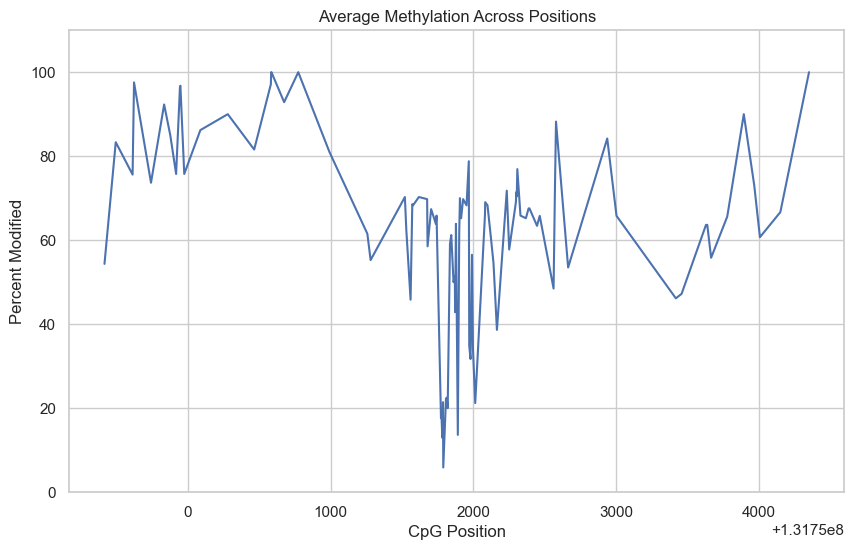

In [19]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='baseStart', y='FracModified', data=pileup, color='b')

# Set plot labels and title
plt.xlabel('CpG Position')
plt.ylabel('Percent Modified')
plt.title('Average Methylation Across Positions')
plt.ylim(0,110)

# Show the plot
plt.show()


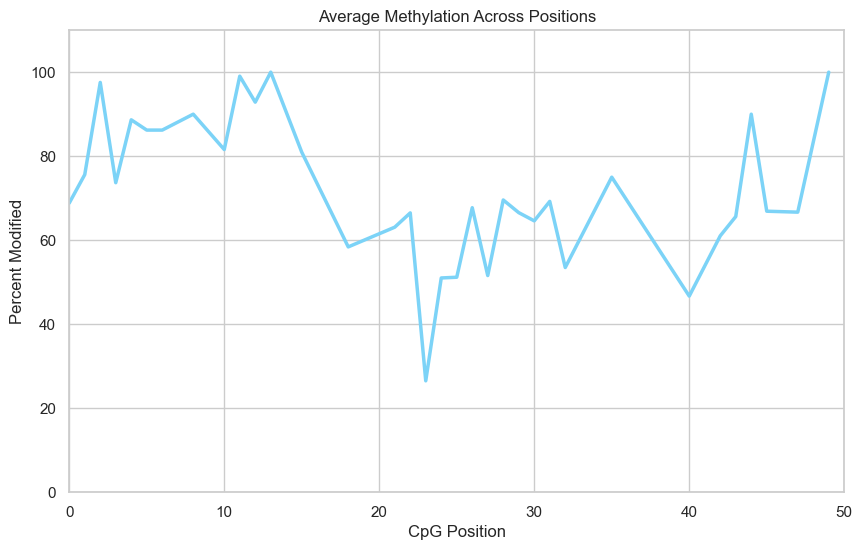

In [30]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='bin', y='FracModified', data=binned_data, markers=None, color='#7CD3F7', linewidth=2.5)

# Set plot labels and title
plt.xlabel('CpG Position')
plt.ylabel('Percent Modified')
plt.title('Average Methylation Across Positions')
plt.ylim(0,110)
plt.xlim(0,50)

# Show the plot
plt.show()


In [6]:
# let's now process all the self-silencing data
mouse_69_2, coverage_69_2 = process('./experiments/231211_Prnp_self-silencing/group_analysis/69-2_pileup.bed')
print('mouse 69.2 has coverage: ',coverage_69_2)
mouse_70_2, coverage_70_2 = process('./experiments/231211_Prnp_self-silencing/group_analysis/70-2_pileup.bed')
print('mouse 70.2 has coverage: ',coverage_70_2)
mouse_70_4, coverage_70_4 = process('./experiments/231211_Prnp_self-silencing/group_analysis/70-4_pileup.bed')
print('mouse 70.4 has coverage: ',coverage_70_4)
mouse_71_2, coverage_71_2 = process('./experiments/231211_Prnp_self-silencing/group_analysis/71-2_pileup.bed')
print('mouse 71.2 has coverage: ',coverage_71_2)
mouse_71_3, coverage_71_3 = process('./experiments/231211_Prnp_self-silencing/group_analysis/71-3_pileup.bed')
print('mouse 71.3 has coverage: ',coverage_71_3)
mouse_73_1, coverage_73_1 = process('./experiments/231211_Prnp_self-silencing/group_analysis/73-1_pileup.bed')
print('mouse 73.1 has coverage: ',coverage_73_1)
mouse_76_2, coverage_76_2 = process('./experiments/231211_Prnp_self-silencing/group_analysis/76-2_pileup.bed')
print('mouse 76.2 has coverage: ',coverage_76_2)
mouse_76_4, coverage_76_4 = process('./experiments/231211_Prnp_self-silencing/group_analysis/76-4_pileup.bed')
print('mouse 76.4 has coverage: ',coverage_76_4)
mouse_79_3, coverage_79_3 = process('./experiments/231211_Prnp_self-silencing/group_analysis/79-3_pileup.bed')
print('mouse 79.3 has coverage: ',coverage_79_3)
mouse_82_3, coverage_82_3 = process('./experiments/231211_Prnp_self-silencing/group_analysis/82-3_pileup.bed')
print('mouse 82.3 has coverage: ',coverage_82_3)
# looks like the median coverage across all mice is 25X

mouse 69.2 has coverage:  19.0
mouse 70.2 has coverage:  44.0
mouse 70.4 has coverage:  12.0
mouse 71.2 has coverage:  26.0
mouse 71.3 has coverage:  12.0
mouse 73.1 has coverage:  32.0
mouse 76.2 has coverage:  46.0
mouse 76.4 has coverage:  7.0
mouse 79.3 has coverage:  22.0
mouse 82.3 has coverage:  29.0


In [7]:
# export all of the data to csv files
mouse_69_2.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP9_rep1.csv', index=False)
mouse_73_1.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP9_rep2.csv', index=False)
mouse_71_2.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP10_rep1.csv', index=False)
mouse_71_3.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP10_rep2.csv', index=False)
mouse_70_2.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP11_rep1.csv', index=False)
mouse_70_4.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP11_rep2.csv', index=False)
mouse_76_2.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP12_rep1.csv', index=False)
mouse_76_4.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP12_rep2.csv', index=False)
mouse_79_3.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/no_injection_rep1.csv', index=False)
mouse_82_3.to_csv('./experiments/231211_Prnp_self-silencing/group_analysis/no_injection_rep2.csv', index=False)


In [6]:
# now averaging Replicate 1 and 2; make function for this
def average_data(Rep1, Rep2):
    average_data = pd.DataFrame()
    average_data['bin'] = Rep1['bin'] # assume same bins for the two replicates
    average_data['FracModified'] = (Rep1['FracModified'] + Rep2['FracModified']) / 2
    return average_data

In [15]:
PRNP9_average = average_data(mouse_69_2, mouse_73_1)
PRNP10_average = average_data(mouse_71_2, mouse_71_3)
PRNP11_average = average_data(mouse_70_2, mouse_70_4)
PRNP12_average = average_data(mouse_76_2, mouse_76_4)
no_injection_average = average_data(mouse_79_3, mouse_82_3)

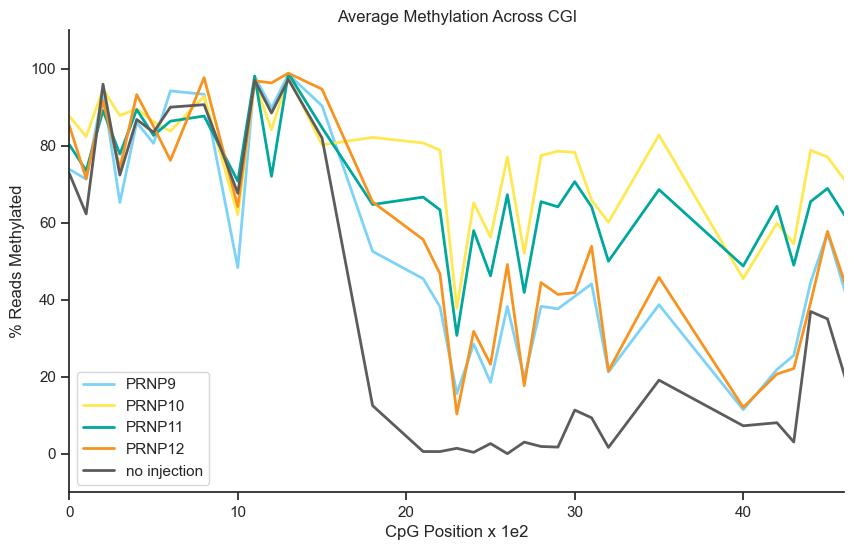

In [17]:
# Set Seaborn style
sns.set(style="ticks")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
# PRNP9
sns.lineplot(x='bin', y='FracModified', data=PRNP9_average, markers=None, color='#7CD3F7', linewidth=2, label='PRNP9')
# PRNP10
sns.lineplot(x='bin', y='FracModified', data=PRNP10_average, markers=None, color='#FFE850', linewidth=2, label='PRNP10')
# PRNP11
sns.lineplot(x='bin', y='FracModified', data=PRNP11_average, markers=None, color='#00A79D', linewidth=2, label='PRNP11')
# PRNP12
sns.lineplot(x='bin', y='FracModified', data=PRNP12_average, markers=None, color='#F7931E', linewidth=2, label='PRNP12')
# no injection
sns.lineplot(x='bin', y='FracModified', data=no_injection_average, markers=None, color='#5C5C5C', linewidth=2, label='no injection')

sns.despine(top=True, right=True)

# Set plot labels and title
plt.xlabel('CpG Position x 1e2')
plt.ylabel('% Reads Methylated')
plt.title('Average Methylation Across CGI')
plt.ylim(-10,110)
plt.xlim(0,46)

# display the legend
plt.legend(loc='lower left')
# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/average_methylation_combined.png', dpi=300)
# Show the plot
plt.show()

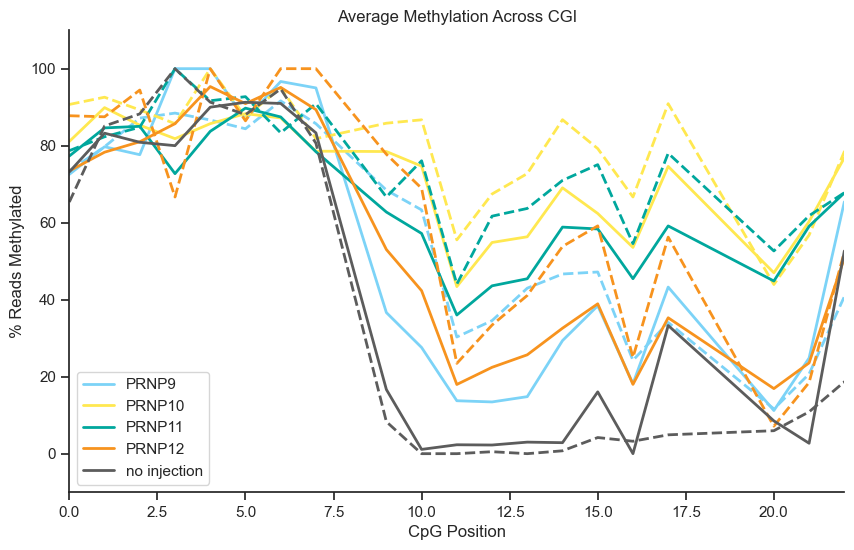

In [51]:
# Set Seaborn style
sns.set(style="ticks")

# Create a line plot using Seaborn
plt.figure(figsize=(10, 6))
# PRNP9
sns.lineplot(x='bin', y='FracModified', data=mouse_69_2, markers=None, color='#7CD3F7', linewidth=2, label='PRNP9')
sns.lineplot(x='bin', y='FracModified', data=mouse_73_1, markers=None, color='#7CD3F7', linewidth=2, linestyle='dashed')
# PRNP10
sns.lineplot(x='bin', y='FracModified', data=mouse_71_2, markers=None, color='#FFE850', linewidth=2, label='PRNP10')
sns.lineplot(x='bin', y='FracModified', data=mouse_71_3, markers=None, color='#FFE850', linewidth=2, linestyle='dashed')
# PRNP11
sns.lineplot(x='bin', y='FracModified', data=mouse_70_2, markers=None, color='#00A79D', linewidth=2, label='PRNP11')
sns.lineplot(x='bin', y='FracModified', data=mouse_70_4, markers=None, color='#00A79D', linewidth=2, linestyle='dashed')
# PRNP12
sns.lineplot(x='bin', y='FracModified', data=mouse_76_2, markers=None, color='#F7931E', linewidth=2, label='PRNP12')
sns.lineplot(x='bin', y='FracModified', data=mouse_76_4, markers=None, color='#F7931E', linewidth=2, linestyle='dashed')
# no injection
sns.lineplot(x='bin', y='FracModified', data=mouse_79_3, markers=None, color='#5C5C5C', linewidth=2, label='no injection')
sns.lineplot(x='bin', y='FracModified', data=mouse_82_3, markers=None, color='#5C5C5C', linewidth=2, linestyle='dashed')

sns.despine(top=True, right=True)

# Set plot labels and title
plt.xlabel('CpG Position')
plt.ylabel('% Reads Methylated')
plt.title('Average Methylation Across CGI')
plt.ylim(-10,110)
plt.xlim(0,22)

# display the legend
plt.legend(loc='lower left')
# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/average_methylation.png', dpi=300)
# Show the plot
plt.show()


In [3]:
# create a function to calculate Pearson correlation coefficients between replicates
def pearson(pileup_file1, pileup_file2):
    pileup1 = pd.read_csv(pileup_file1, sep='\s+', header=None)
    pileup2 = pd.read_csv(pileup_file2, sep='\s+', header=None)
    header = ['chrom', 'chromStart', 'chromEnd', 'modbase', 'score', 'strand', 'baseStart', 'baseEnd', 'RGB', 'ValidCoverage', 'FracModified', 'NumMod', 'NumCanonical', 
             'NumOther', 'NumDelete', 'NumFail', 'NumDiff', 'NumNoCall']
    pileup1.columns = header[:len(pileup1.columns)]
    pileup1['position'] = pileup1['baseEnd'] - 131749415 #mouse window start
    #pileup1['position'] = pileup1['baseEnd'] - XXXX #human window start
    pileup2.columns = header[:len(pileup2.columns)]
    pileup2['position'] = pileup2['baseEnd'] - 131749415 #mouse window start
    #pileup2['position'] = pileup2['baseEnd'] - XXXX #human window start

    # merge the datasets on common positions
    merged = pd.merge(pileup1, pileup2, on='position', suffixes=('_rep1','_rep2'))
    # Calculate the Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(merged['FracModified_rep1'], merged['FracModified_rep2'])

    return merged, correlation_coefficient

In [4]:
# create a function to calculate Pearson correlation coefficients between replicates
# this is the human PRNP version
def pearson_h(pileup_file1, pileup_file2):
    pileup1 = pd.read_csv(pileup_file1, sep='\s+', header=None)
    pileup2 = pd.read_csv(pileup_file2, sep='\s+', header=None)
    header = ['chrom', 'chromStart', 'chromEnd', 'modbase', 'score', 'strand', 'baseStart', 'baseEnd', 'RGB', 'ValidCoverage', 'FracModified', 'NumMod', 'NumCanonical', 
             'NumOther', 'NumDelete', 'NumFail', 'NumDiff', 'NumNoCall']
    pileup1.columns = header[:len(pileup1.columns)]
    pileup1['position'] = pileup1['baseEnd'] - 4684180 #human window start
    pileup2.columns = header[:len(pileup2.columns)]
    pileup2['position'] = pileup2['baseEnd'] - 4684180 #human window start

    # merge the datasets on common positions
    merged = pd.merge(pileup1, pileup2, on='position', suffixes=('_rep1','_rep2'))
    # Calculate the Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(merged['FracModified_rep1'], merged['FracModified_rep2'])

    return merged, correlation_coefficient

In [16]:
# now calculate correlation between all the replicates
PRNP9, corr_PRNP9 = pearson('./experiments/231211_Prnp_self-silencing/group_analysis/69-2_pileup.bed',
                            './experiments/231211_Prnp_self-silencing/group_analysis/73-1_pileup.bed')
PRNP10, corr_PRNP10 = pearson('./experiments/231211_Prnp_self-silencing/group_analysis/71-2_pileup.bed',
                            './experiments/231211_Prnp_self-silencing/group_analysis/71-3_pileup.bed')
PRNP11, corr_PRNP11 = pearson('./experiments/231211_Prnp_self-silencing/group_analysis/70-2_pileup.bed',
                            './experiments/231211_Prnp_self-silencing/group_analysis/70-4_pileup.bed')
PRNP12, corr_PRNP12 = pearson('./experiments/231211_Prnp_self-silencing/group_analysis/76-2_pileup.bed',
                            './experiments/231211_Prnp_self-silencing/group_analysis/76-4_pileup.bed')
no_injection, corr_no_injection = pearson('./experiments/231211_Prnp_self-silencing/group_analysis/79-3_pileup.bed',
                            './experiments/231211_Prnp_self-silencing/group_analysis/82-3_pileup.bed')

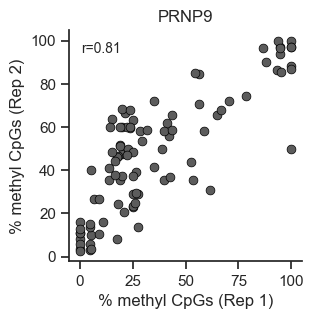

In [53]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=PRNP9, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_PRNP9:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('PRNP9')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP9_correlation.png', dpi=300)
# Show the plot
plt.show()

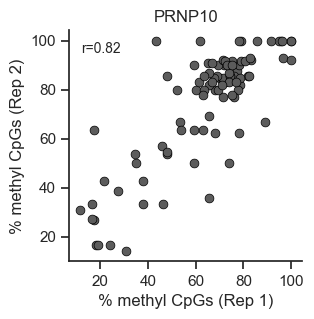

In [54]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=PRNP10, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_PRNP10:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('PRNP10')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP10_correlation.png', dpi=300)
# Show the plot
plt.show()

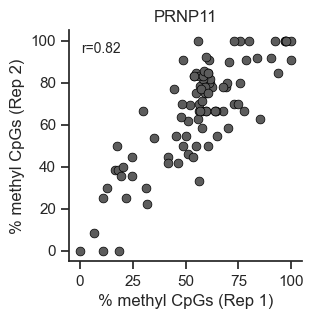

In [55]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=PRNP11, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_PRNP11:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('PRNP11')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP11_correlation.png', dpi=300)
# Show the plot
plt.show()

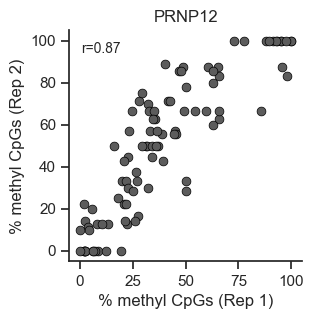

In [56]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=PRNP12, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_PRNP12:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('PRNP12')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/PRNP12_correlation.png', dpi=300)
# Show the plot
plt.show()

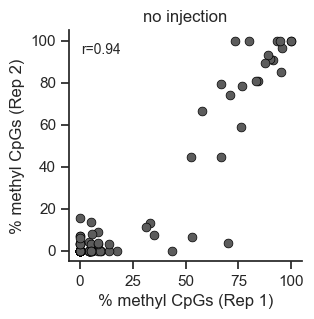

In [57]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=no_injection, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_no_injection:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('no injection')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231211_Prnp_self-silencing/group_analysis/no_injection_correlation.png', dpi=300)
# Show the plot
plt.show()

In [10]:
# continue to get correlation between replicates
# cell culture samples
HEK_CRISPRi, corr_HEK_CRISPRi = pearson_h('./experiments/240116_PRNP_cell_culture/HEK_CRISPRi_Rep1/pass/methyl_pileup.bed',
                            './experiments/240116_PRNP_cell_culture/HEK_CRISPRi_Rep2/pass/methyl_pileup.bed')
HEK_CRISPRoff, corr_HEK_CRISPRoff = pearson_h('./experiments/240116_PRNP_cell_culture/HEK_CRISPRoff_Rep1/pass/methyl_pileup.bed',
                            './experiments/240116_PRNP_cell_culture/HEK_CRISPRoff_Rep2/pass/methyl_pileup.bed')
N2a_CRISPRoff, corr_N2a_CRISPRoff = pearson('./experiments/240116_PRNP_cell_culture/N2a_CRISPRoff_Rep1/pass/methyl_pileup.bed',
                            './experiments/240116_PRNP_cell_culture/N2a_CRISPRoff_Rep2/pass/methyl_pileup.bed')
N2a_CRISPRi, corr_N2a_CRISPRi = pearson('./experiments/240116_PRNP_cell_culture/N2a_CRISPRi_Rep1/pass/methyl_pileup.bed',
                            './experiments/240116_PRNP_cell_culture/N2a_CRISPRi_Rep2/pass/methyl_pileup.bed')

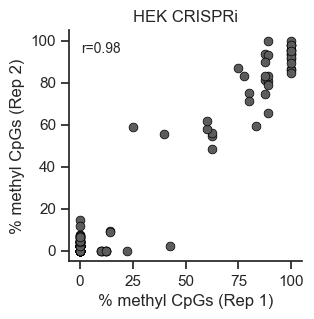

In [7]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=HEK_CRISPRi, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_HEK_CRISPRi:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('HEK CRISPRi')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/240116_PRNP_cell_culture/HEK_CRISPRi_correlation.png', dpi=300)
# Show the plot
plt.show()

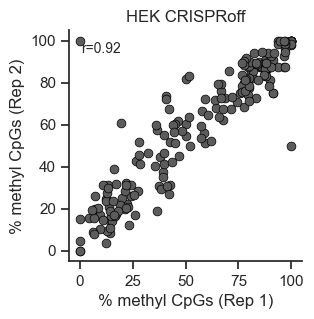

In [9]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=HEK_CRISPRoff, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_HEK_CRISPRoff:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('HEK CRISPRoff')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/240116_PRNP_cell_culture/HEK_CRISPRoff_correlation.png', dpi=300)
# Show the plot
plt.show()

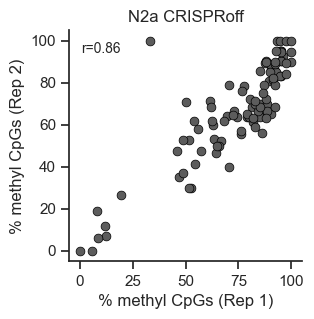

In [11]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=N2a_CRISPRoff, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_N2a_CRISPRoff:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('N2a CRISPRoff')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/240116_PRNP_cell_culture/N2a_CRISPRoff_correlation.png', dpi=300)
# Show the plot
plt.show()

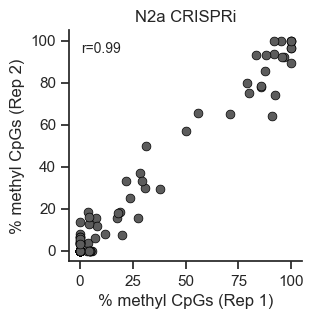

In [12]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=N2a_CRISPRi, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_N2a_CRISPRi:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('N2a CRISPRi')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/240116_PRNP_cell_culture/N2a_CRISPRi_correlation.png', dpi=300)
# Show the plot
plt.show()

In [17]:
# in vivo 6wk samples
mouse_krabless, corr_mouse_krabless = pearson('./experiments/231216_Prnp_KRABless/mouse_980-1/20231216_1354_MN44120_FAY08737_953dd6cb/fast5_pass/pass/modkit_pileup.bed',
                            './experiments/231216_Prnp_KRABless/mouse_980-2/20231217_1339_MN44120_FAY08737_2026174d/fast5_pass/pass/modkit_pileup.bed')
mouse_krab, corr_mouse_krab = pearson('./experiments/240121_Prnp_in-vivo_final_samples/mouse_PRNP11_6wk_rep1/methyl_pileup.bed',
                            './experiments/240121_Prnp_in-vivo_final_samples/mouse_979-1_6wk_PRNP11/pass/methyl_pileup.bed')
mouse_ctrl, corr_mouse_ctrl = pearson('./experiments/240121_Prnp_in-vivo_final_samples/mouse_no-injection_6wk_rep1/methyl_pileup.bed',
                            './experiments/240121_Prnp_in-vivo_final_samples/mouse_75-1_6wk_no-injection/pass/methyl_pileup.bed')

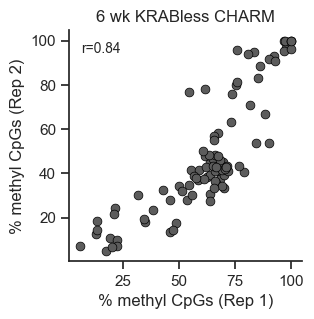

In [14]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=mouse_krabless, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_mouse_krabless:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('6 wk KRABless CHARM')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/231216_Prnp_KRABless/mouse_krabless_correlation.png', dpi=300)
# Show the plot
plt.show()

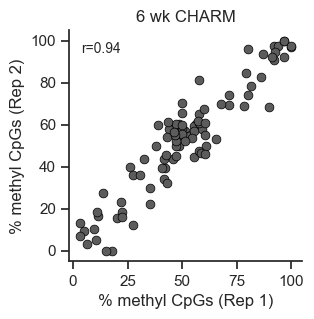

In [16]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=mouse_krab, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_mouse_krab:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('6 wk CHARM')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/240121_Prnp_in-vivo_final_samples/mouse_krab_correlation.png', dpi=300)
# Show the plot
plt.show()

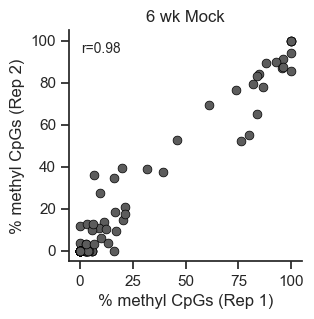

In [18]:
# plot the correlation between replicates
# Set Seaborn style
sns.set(style="ticks")

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(3, 3))
sns.scatterplot(x='FracModified_rep1', y='FracModified_rep2', data=mouse_ctrl, color='#5C5C5C', edgecolor='#000000', s=40)
sns.despine(top=True, right=True)

# Display the Pearson correlation coefficient as text
plt.text(0.05, 0.9, f"r={corr_mouse_ctrl:.2f}", fontsize=10, transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('% methyl CpGs (Rep 1)')
plt.ylabel('% methyl CpGs (Rep 2)')
plt.title('6 wk Mock')

# Save the plot as a high-quality PNG file
plt.savefig('./experiments/240121_Prnp_in-vivo_final_samples/mouse_ctrl_correlation.png', dpi=300)
# Show the plot
plt.show()